# DIABETES PREDICTION-MACHINE LEARNING

### Question 2

Consider the diabetes data (diabetes.csv) has a response variable of whether a person is having diabetes, which is given by a 1.

* Import the dataset from https://www.kaggle.com/uciml/pima-indians-diabetes-database (1 points).
* Extract X as all columns except the last column and Y as last column. (1 points)
* Visualize the dataset using any two appropriate plots. (2 points)
* Split the data into training set and testing set. (1 points)
* Train a Logistic regression model for the dataset. (1 points)
* Display the coefficients and form the logistic regression equation. (1 point)
* Compute the accuracy and confusion matrix. (2 points)
* Plot the decision boundary. (1 point)
* Identify which of the following variables are positively associated with the target column. (1 point)
* For a woman aged 35 and mother of 2 children, predict and display the class, if her bmi was 35 instead of 24 according to the model? (2 points).

## Import Libraries

In [5]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
from sklearn import metrics
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
import numpy as np
from sklearn.externals import joblib

## 1. Import the dataset

In [6]:
data = pd.read_csv(filepath_or_buffer='./diabetes.csv')

In [38]:
data.head()
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


## 2. Extract X as all columns except the last column and Y as last column

In [8]:
#y = data.Outcome
#x = data.drop('Outcome',axis=1)
X = data[data.columns[0:8]]
y = data[data.columns[8:9]] 

In [9]:
X.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33


In [10]:
y.head()

,Outcome
0,1
1,0
2,1
3,0
4,1


## 3. Visualize the dataset

In [11]:
#Getting the number of diabetic (1) and Non Diabetic (0) women. 
data['Outcome'].value_counts()
count_no_sub = len(data[data['Outcome']==0])
count_sub = len(data[data['Outcome']==1])
pct_of_no_sub = count_no_sub/(count_no_sub+count_sub)
print("percentage of not Diabetic", pct_of_no_sub*100)
pct_of_sub = count_sub/(count_no_sub+count_sub)
print("percentage of Diabetic", pct_of_sub*100)

percentage of not Diabetic 65.10416666666666
percentage of Diabetic 34.89583333333333


In [12]:
data.groupby('Outcome').mean()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Outcome,,,,,,,,
0,3.298000,109.980000,68.184000,19.664000,68.792000,30.304200,0.429734,31.190000
1,4.865672,141.257463,70.824627,22.164179,100.335821,35.142537,0.550500,37.067164


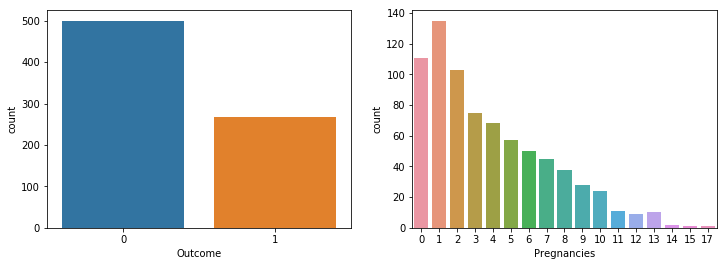

In [13]:
#Plotting the number of diabetic (1) and Non Diabetic (0) women. 
#Plotting number of pregnancies
_, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 4))
sns.countplot(x='Outcome', data=data, ax=axes[0]);
sns.countplot(x='Pregnancies', data=data, ax=axes[1]);

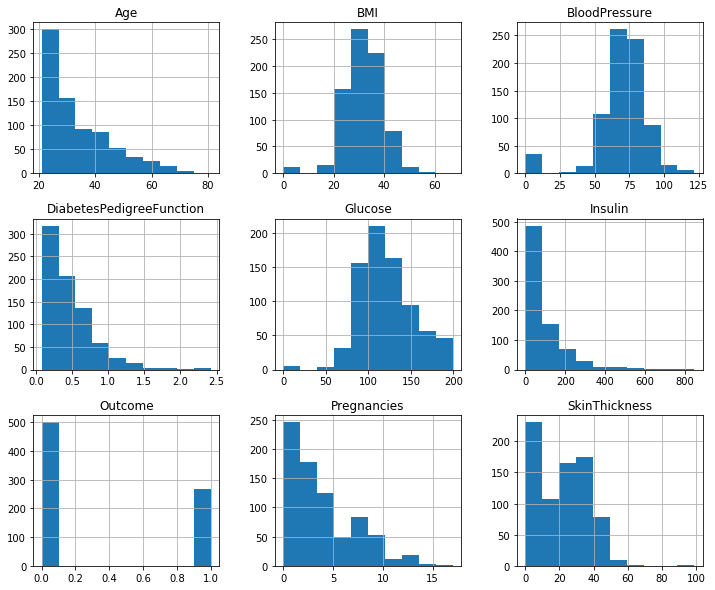

In [14]:
#Plots of all the variables
data.hist(figsize=(12, 10))

plt.show()

C:\Users\poornimaj\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


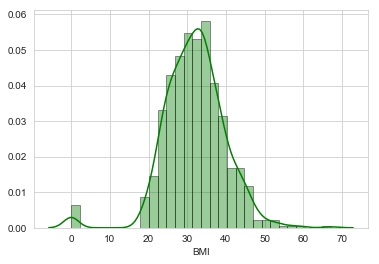

In [15]:
# BMI plot
sns.set_style('whitegrid')
#sns.countplot(x='Outcome', hue='Age', data=data)
sns.distplot(data['BMI'], kde=True, bins=30, color='Green',
            hist_kws={'edgecolor':'black'})

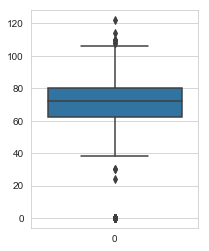

In [16]:
#BP plot
_, ax = plt.subplots(figsize=(3, 4))
sns.boxplot(data=data['BloodPressure'], ax=ax);

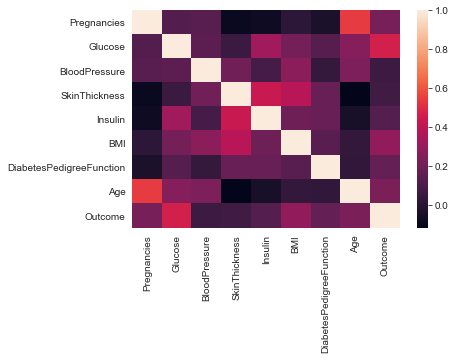

In [17]:
#look at the correlations among the numerical variables in our dataset. 
#This information is important to know as logistic regression does not handle highly correlated input variables well
#brighter colors indicate more correlation
corr_matrix = data.corr()
sns.heatmap(corr_matrix);

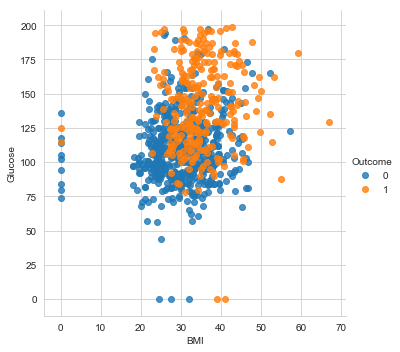

In [18]:
# Plot of BMI vs Glocose with Outcomes highlighted
sns.lmplot('BMI', 'Glucose', data=data, 
           hue='Outcome', fit_reg=False);

## 4. Split the data into training set and testing set

In [19]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25)
X_train.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
530,2,122,60,18,106,29.8,0.717,22
346,1,139,46,19,83,28.7,0.654,22
13,1,189,60,23,846,30.1,0.398,59
254,12,92,62,7,258,27.6,0.926,44
368,3,81,86,16,66,27.5,0.306,22


**Normalise the data. This impacts the results**

In [20]:
means = np.mean(X_train, axis=0)
stds = np.std(X_train, axis=0)
X_train = (X_train - means)/stds
X_test = (X_test - means)/stds

 ## 5. Logistic regression

In [29]:
lm = LogisticRegression()
lm.fit(X_train,y_train)
y_pred=lm.predict(X_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.84      0.89      0.86       132
           1       0.73      0.62      0.67        60

   micro avg       0.81      0.81      0.81       192
   macro avg       0.78      0.76      0.77       192
weighted avg       0.80      0.81      0.80       192



C:\Users\poornimaj\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\poornimaj\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


## 6. Display the coefficients and form the logistic regression equation

In [22]:
df_coefs = pd.DataFrame(lm.coef_[0], index=X.columns, columns = ['Coefficient'])
df_coefs

,Coefficient
Pregnancies,0.364222
Glucose,1.009887
BloodPressure,-0.165351
SkinThickness,-0.017846
Insulin,-0.101007
BMI,0.712893
DiabetesPedigreeFunction,0.347770
Age,0.205228


## 7. Compute the accuracy and confusion matrix.

In [23]:
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
print(cnf_matrix)

print('True positive = ', cnf_matrix[0][0])
print('False positive = ', cnf_matrix[0][1])
print('False negative = ', cnf_matrix[1][0])
print('True negative = ', cnf_matrix[1][1])
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))

[[118  14]
 [ 23  37]]
True positive =  118
False positive =  14
False negative =  23
True negative =  37
Accuracy: 0.8072916666666666
Precision: 0.7254901960784313
Recall: 0.6166666666666667


**ROC Curve**

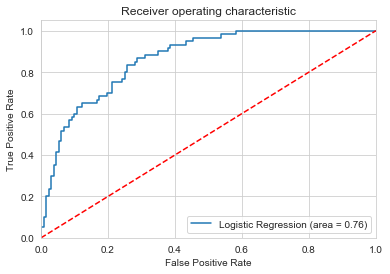

In [24]:
logit_roc_auc = roc_auc_score(y_test, lm.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, lm.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

## 8. Plot the decision boundary.

C:\Users\poornimaj\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


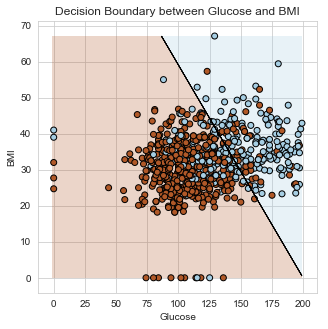

In [25]:
X = data[['Glucose', 'BMI']]
Y = data['Outcome']

logreg = LogisticRegression()
logreg.fit(X, Y)

x_min, x_max = X['Glucose'].min()-1, X['Glucose'].max()
y_min, y_max = X['BMI'].min(), X['BMI'].max()
h = .02  # step size in the mesh
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = logreg.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure(figsize=(5,5))
plt.contourf(xx, yy, Z, cmap='Paired_r', alpha=0.25)
plt.contour(xx, yy, Z, colors='k', linewidths=0.7)
plt.scatter(X['Glucose'], X['BMI'], c=Y, cmap='Paired_r', edgecolors='k')
plt.xlabel('Glucose')
plt.ylabel('BMI')
plt.title('Decision Boundary between Glucose and BMI')
plt.show()

## 9. Identify which of the following variables are positively associated with the target column.

Text(0.5, 0, 'Importance')

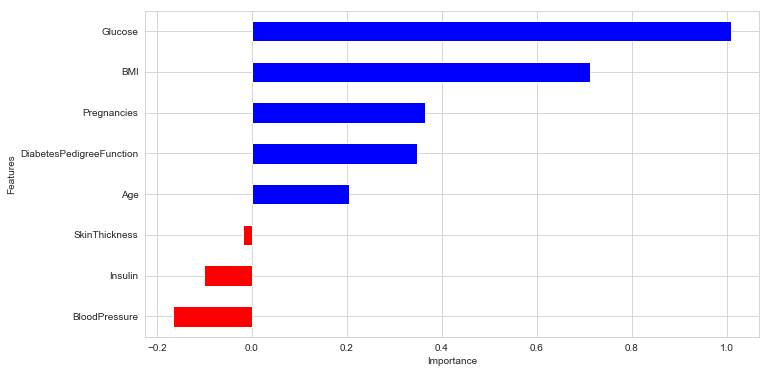

In [26]:
#data.drop("Outcome", axis=1).apply(lambda x: x.corr(data.Outcome))
#data[data.columns[0:]].corr()['Outcome'][:]
coeff = list(lm.coef_[0])
labels = list(X_train.columns)
features = pd.DataFrame()
features['Features'] = labels
features['importance'] = coeff
features.sort_values(by=['importance'], ascending=True, inplace=True)
features['positive'] = features['importance'] > 0
features.set_index('Features', inplace=True)
features.importance.plot(kind='barh', figsize=(11, 6),color = features.positive.map({True: 'blue', False: 'red'}))
plt.xlabel('Importance')

**Glucose,BMI,Pregnancies,Diabetes Pedigree function,Age positively impact the outcome . Insulin and BP have negative impact**

## 10. For a woman aged 35 and mother of 2 children, predict and display the class, if her bmi was 35 instead of 24 according to the model?

In [80]:
sampledata = {'Pregnancies':[2,2],'Glucose':[0,0],'BloodPressure':[0,0],'SkinThickness':[0,0],'Insulin':[0,0],'BMI':[35,24],'DiabetesPedigreeFunction':[0,0],'Age':[35,35]}
#sampledata = {'Pregnancies':[2,2],'Glucose':[121,121],'BloodPressure':[69,69],'SkinThickness':[20,20],'Insulin':[80,80],'BMI':[35,24],'DiabetesPedigreeFunction':[.471,.471],'Age':[35,35]}
#sampledata = {'Pregnancies':[2],'Glucose':[0],'BloodPressure':[0],'SkinThickness':[0],'Insulin':[0],'BMI':[35],'DiabetesPedigreeFunction':[0],'Age':[35]}
#sampledata = {'Pregnancies':[2],'BMI':[24],'Age':[35]}
df = pd.DataFrame(sampledata)
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,2,0,0,0,0,35,0,35
1,2,0,0,0,0,24,0,35


In [81]:
predictionProbability = lm.predict_proba(df)
prediction = lm.predict(df)
print('Probability:', predictionProbability)
print('prediction:', prediction)

Probability: [[1.15463195e-14 1.00000000e+00]
 [2.94941849e-11 1.00000000e+00]]
prediction: [1 1]


**It is predicted that 35 year old woman with 2 children with BMI 35 will be diabetic.**
**It is predicted that 35 year old woman with 2 children with BMI 24 also will be diabetic.**